# Explore here

In [2]:
# Your code here
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Get data
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv", sep=';')

df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.shape

(1599, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df[df.duplicated(keep=False)]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
22,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1567,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1579,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [8]:
round(df.describe(),2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [9]:
df.duplicated().sum()


np.int64(240)

In [10]:
df_sin_duplicados = df.drop_duplicates()
df_sin_duplicados.shape

(1359, 12)

In [11]:
print('Se ha eliminado el',(len(df_sin_duplicados) / len(df) -1) *100,'%','del dataset') 

Se ha eliminado el -15.0093808630394 % del dataset


In [12]:
df_sin_duplicados['quality'].value_counts().sort_values()

quality
3     10
8     17
4     53
7    167
6    535
5    577
Name: count, dtype: int64

In [ ]:
df_sin_duplicados["quality_grouped"] = df_sin_duplicados["quality"].replace({
    3: 4,
    4: 4,
    8: 7  
})


## Análisis de los datos

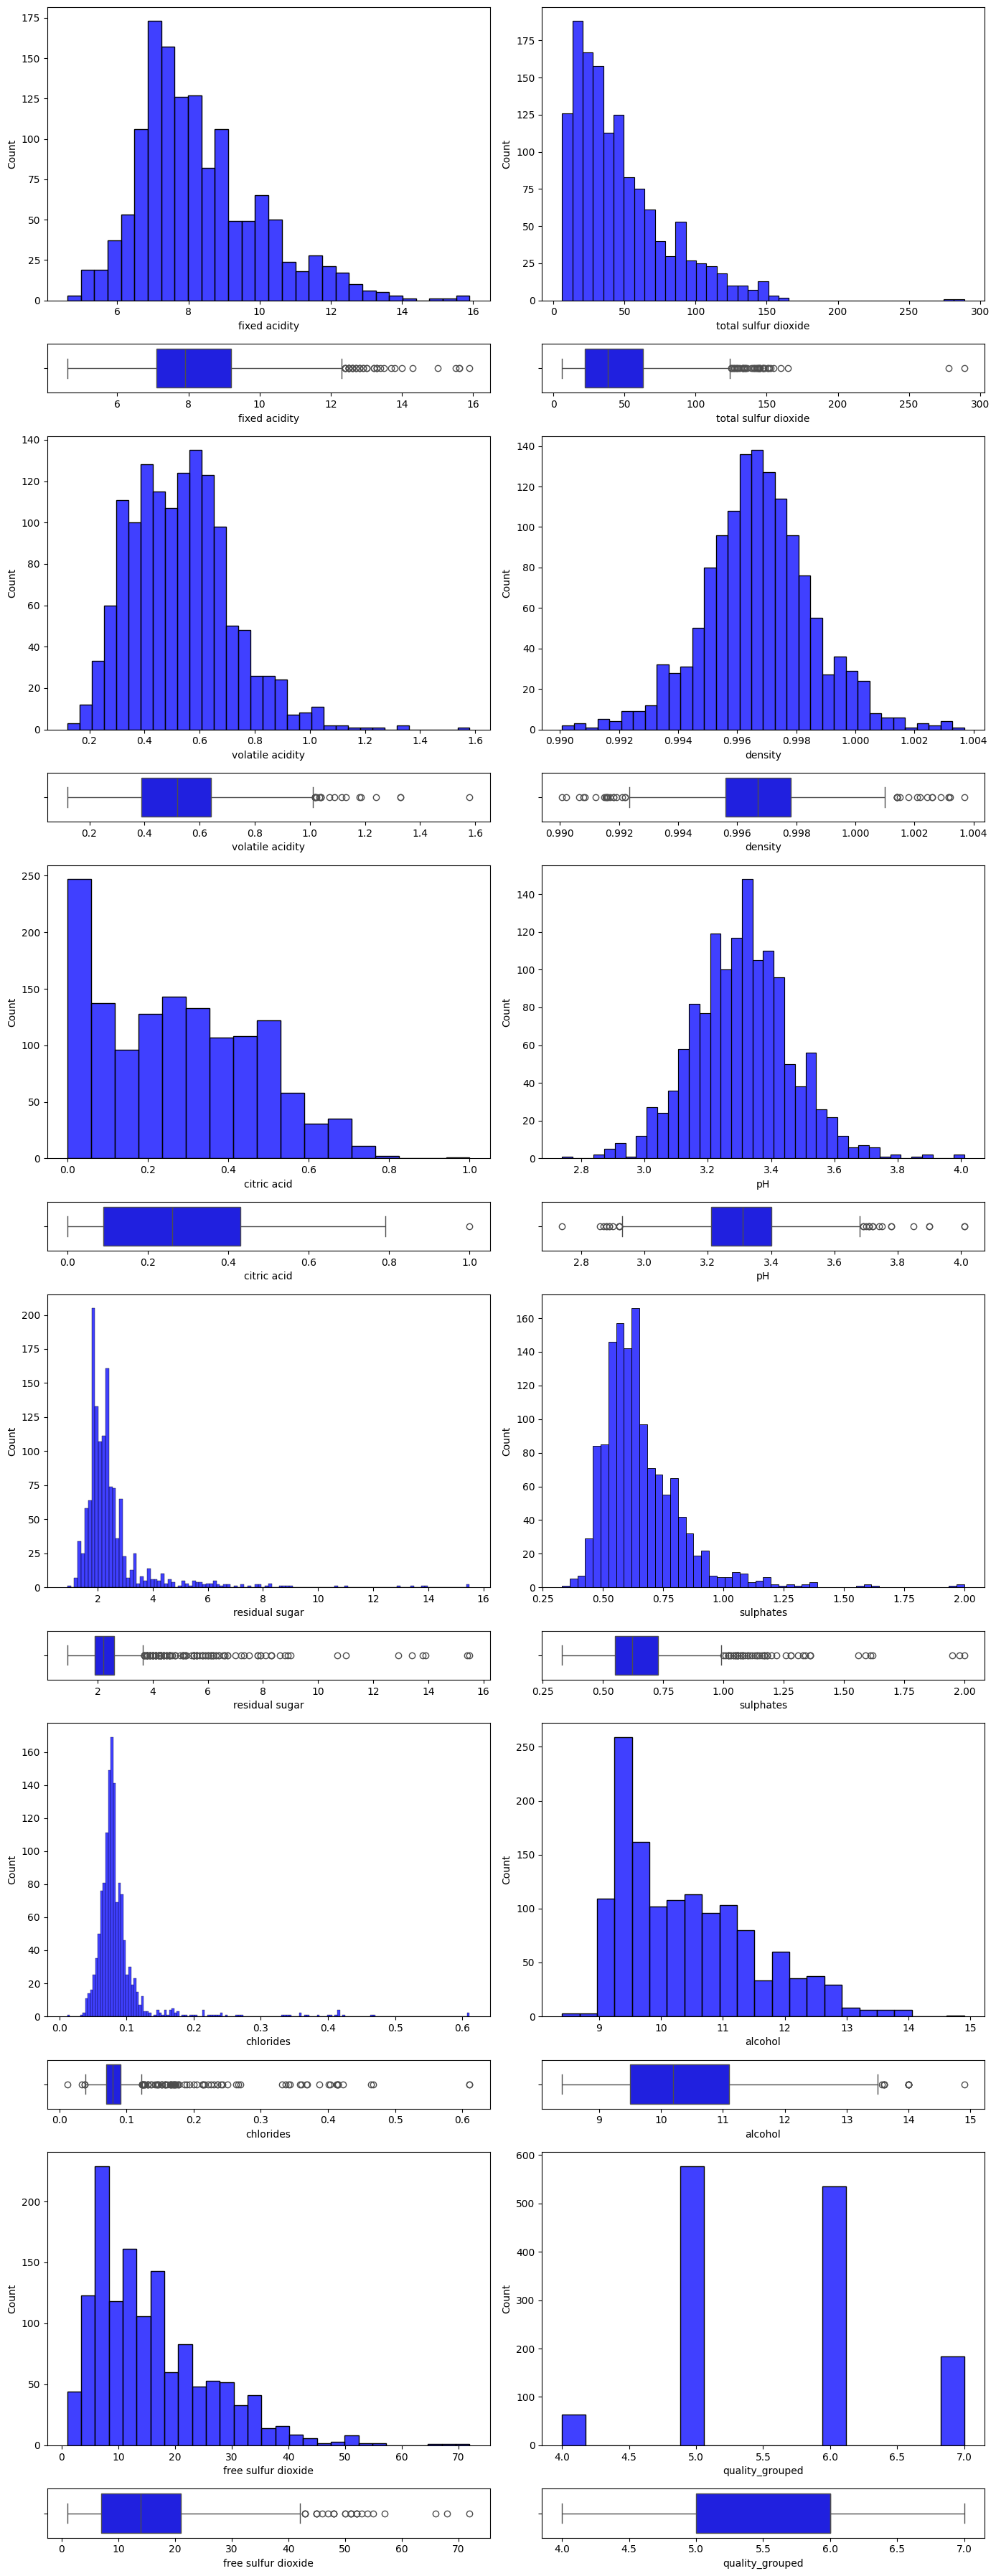

In [14]:
# Lista de variables numéricas
variables = [
    "fixed acidity", "volatile acidity", "citric acid", "residual sugar",
    "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
    "pH", "sulphates", "alcohol", "quality_grouped"
]

# Creamos 12 filas (6 variables x 2 filas cada una), 2 columnas (2 variables por fila)
fig, axis = plt.subplots(12, 2, figsize=(14, 36),gridspec_kw={"height_ratios": [6, 1]*6})

for idx, var in enumerate(variables):
    col = idx // 6        # 0 para las primeras 6, 1 para las otras 6
    row = (idx % 6) * 2   # filas 0, 2, 4... para histogramas; +1 para boxplots

    sns.histplot(ax=axis[row, col], data=df_sin_duplicados, x=var, color='b')
    axis[row, col]

    sns.boxplot(ax=axis[row + 1, col], data=df_sin_duplicados, x=var, orient='h', color='b')
    axis[row + 1, col]

# Ajustamos el diseño
plt.tight_layout()
plt.show()

<Axes: >

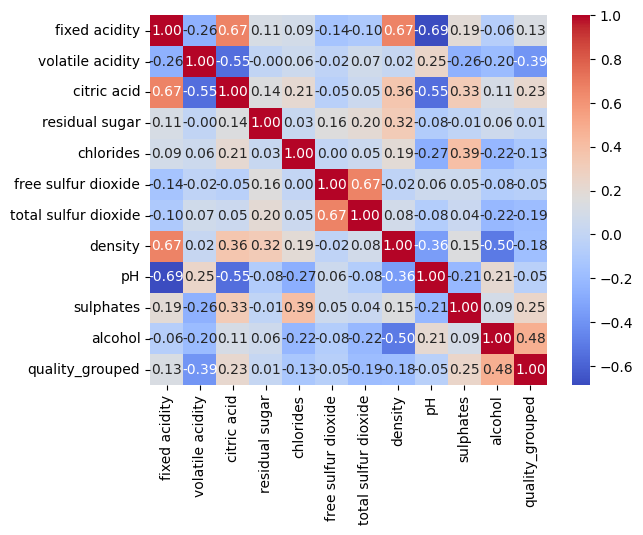

In [15]:
df_clean = df_sin_duplicados.drop(columns='quality') 
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm',fmt = ".2f")

## Outliers

In [50]:
# Detectar outliers usando el método IQR
outliers = {}

for columna in df_clean:
    Q1 = df_clean[columna].quantile(0.25)
    Q3 = df_clean[columna].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.8 * IQR
    outlier_indices = df_clean[(df_clean[columna] < lower_bound) | (df_clean[columna] > upper_bound)].index
    outliers[columna] = len(outlier_indices)
    print(f"'{columna}': {len(outlier_indices)} outliers detectados.")


'fixed acidity': 18 outliers detectados.
'volatile acidity': 8 outliers detectados.
'citric acid': 0 outliers detectados.
'residual sugar': 113 outliers detectados.
'chlorides': 77 outliers detectados.
'free sulfur dioxide': 19 outliers detectados.
'total sulfur dioxide': 27 outliers detectados.
'density': 28 outliers detectados.
'pH': 19 outliers detectados.
'sulphates': 43 outliers detectados.
'alcohol': 7 outliers detectados.
'quality_grouped': 0 outliers detectados.


In [51]:
# Copia del DataFrame para no tocar el original
df_sin_outliers = df_clean.copy()

for columna in df_clean:
    Q1 = df_sin_outliers[columna].quantile(0.25)
    Q3 = df_sin_outliers[columna].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.8 * IQR
    # Filtrar los datos que están dentro de los límites
    df_sin_outliers = df_sin_outliers[(df_sin_outliers[columna] >= lower_bound) & (df_sin_outliers[columna] <= upper_bound)]

print(f"Nuevo tamaño del DataFrame: {df_sin_outliers.shape}")

Nuevo tamaño del DataFrame: (1070, 12)


In [52]:
print("Porcentaje que se redujo:",((len(df_sin_outliers) / len(df_clean))-1)*100,"%")

Porcentaje que se redujo: -21.265636497424577 %


## Split

In [53]:
X = df_sin_outliers.drop(columns='quality_grouped')
y = df_sin_outliers['quality_grouped']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Mostrar X
print('El tamaño de X train es de:' ,X_train.shape)
print('El tamaño de Y train es de:' ,y_train.shape)
print('El tamaño de X test es de:' ,X_test.shape)
print('El tamaño de y test es de:' ,y_test.shape)

El tamaño de X train es de: (856, 11)
El tamaño de Y train es de: (856,)
El tamaño de X test es de: (214, 11)
El tamaño de y test es de: (214,)


## Scaled
* X_train_scaled = scaler.fit_transform(X_train)

    - Ajusta (fit) el escalador usando solo los datos de entrenamiento (X_train):

    - Calcula la media y desviación estándar de cada columna.

    - Luego transforma esos datos (transform) usando los valores calculados.

    - Resultado: X_train escalado (centrado en 0 y con varianza 1).


- X_test_scaled = scaler.transform(X_test)

    - Importante: aquí no se usa fit_transform, solo transform.

    - Esto asegura que el escalado del conjunto de prueba se haga usando las mismas medias y desviaciones estándar que se obtuvieron del entrenamiento (para evitar data leakage).

    - Resultado: X_test escalado de forma consistente con el entrenamiento.



In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [55]:
y.value_counts()

quality_grouped
5    456
6    442
7    131
4     41
Name: count, dtype: int64

## Modelado

In [69]:
# modelo
model = KNeighborsClassifier(n_neighbors=4)

# entrenamiento
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=4)

In [71]:
# predicion
y_pred_test = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)

y_pred_test

array([5, 6, 5, 6, 4, 6, 6, 7, 5, 6, 5, 6, 7, 5, 5, 6, 5, 5, 6, 6, 6, 6,
       5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 7, 7, 7, 5, 7, 5, 6, 5, 7, 5,
       5, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6,
       6, 6, 6, 5, 6, 5, 7, 5, 5, 5, 6, 6, 5, 6, 7, 5, 5, 5, 6, 5, 5, 6,
       4, 6, 6, 5, 5, 5, 6, 6, 6, 7, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6,
       5, 5, 5, 5, 4, 6, 7, 7, 5, 5, 6, 6, 5, 5, 6, 6, 5, 4, 5, 6, 6, 5,
       6, 5, 6, 7, 6, 5, 5, 5, 6, 5, 6, 5, 5, 7, 6, 6, 5, 6, 5, 5, 5, 5,
       6, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5,
       6, 5, 6, 6, 7, 5, 6, 6, 6, 5, 5, 7, 6, 6, 6, 5, 5, 7, 5, 6, 5, 5,
       5, 5, 5, 5, 6, 5, 6, 7, 5, 6, 5, 6, 6, 6, 5, 5])

In [72]:
X_train_scaled.shape

(856, 11)

In [73]:
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Accuracy Test: ", accuracy_test)
print("Accuracy Train: ", accuracy_train)

Accuracy Test:  0.5981308411214953
Accuracy Train:  0.7289719626168224


In [74]:
k_range = range(2, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)

    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

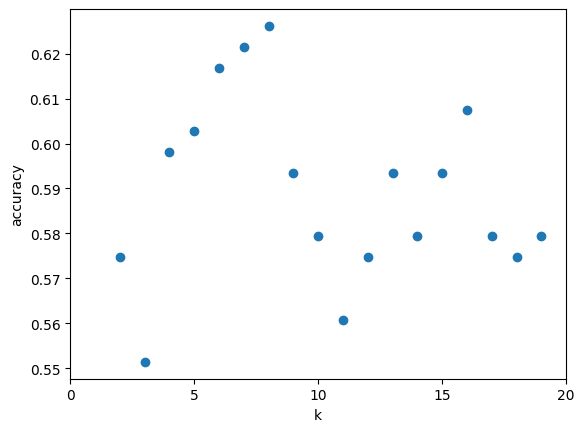

In [75]:
plt.scatter(k_range, scores)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.xticks([0,5,10,15,20])
plt.show()

In [76]:
best_k = k_range[scores.index(max(scores))]
print(f"Mejor valor de k: {best_k}")

Mejor valor de k: 8


In [77]:
# mejor modelo
model_best = KNeighborsClassifier(n_neighbors=best_k)

# entrenamiento
model_best.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=8)

In [78]:
# predicion
y_pred_test_b = model_best.predict(X_test_scaled)
y_pred_train_b = model_best.predict(X_train_scaled)

y_pred_test_b

array([5, 6, 5, 6, 4, 6, 6, 7, 6, 6, 5, 6, 7, 5, 5, 6, 5, 5, 6, 6, 6, 5,
       5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 5, 6, 5, 7, 5, 7, 5,
       5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 7, 5, 5, 5, 7, 5, 5, 6,
       6, 6, 6, 5, 5, 6, 6, 6, 6, 7, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6,
       5, 5, 5, 5, 6, 6, 7, 7, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5,
       5, 5, 7, 7, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 7, 6, 5, 6, 6, 5, 5, 5,
       6, 5, 5, 5, 6, 6, 5, 5, 7, 6, 6, 6, 5, 5, 5, 4, 6, 5, 5, 6, 5, 5,
       6, 5, 6, 6, 7, 5, 5, 6, 6, 5, 5, 7, 6, 6, 6, 5, 5, 7, 5, 6, 5, 5,
       5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 5, 5])

In [79]:
accuracy_test_b = accuracy_score(y_test, y_pred_test_b)
accuracy_train_b = accuracy_score(y_train, y_pred_train_b)

print("Accuracy Test: ", accuracy_test_b)
print("Accuracy Train: ", accuracy_train_b)

Accuracy Test:  0.6261682242990654
Accuracy Train:  0.6822429906542056


## Función 


In [80]:
y.value_counts()

quality_grouped
5    456
6    442
7    131
4     41
Name: count, dtype: int64

In [84]:
# 10. Función para predecir calidad del vino
def predict_wine_quality(features):
    features_scaled = scaler.transform([features])
    pred = model_best.predict(features_scaled)[0]
    if pred <= 4:
        return "Este vino probablemente sea de baja calidad 🍷"
    elif pred == 5:
        return "Este vino probablemente sea de calidad media 🍷"
    elif pred == 6:
        return "Este vino probablemente sea de anta calidad 🍷"
    else:
        return "Este vino probablemente sea de excelente calidad 🍷"

In [86]:
resultado = predict_wine_quality([7.4, 0.7, 0.0, 1.9, 0.076,11.0, 34.0, 0.9978, 3.51, 0.56, 9.4])
print("\nPredicción de ejemplo:", resultado)


Predicción de ejemplo: Este vino probablemente sea de calidad media 🍷
